In [ ]:
"""
Machine learning with logistic regression.
Data: Titanic passengers.
"""

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
# Data
train = pd.read_csv("files/titanic_train.csv")

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:>

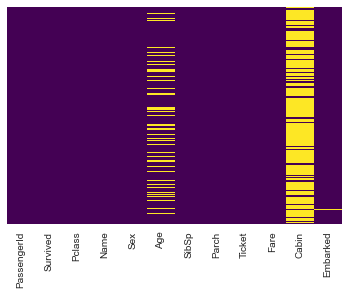

In [41]:
# checking which rows have no value
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap="viridis")

In [42]:
sns.set_style("whitegrid")

<AxesSubplot:xlabel='Survived', ylabel='count'>

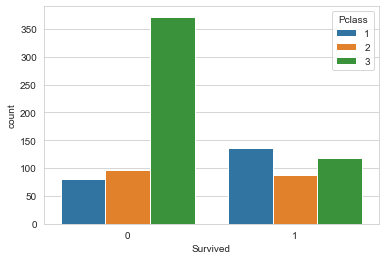

In [43]:
# countplot by ticket class among those who survived and did not survive Titanic catastrophy.
sns.countplot(x="Survived", data=train, hue="Pclass")

<AxesSubplot:xlabel='Age', ylabel='Count'>

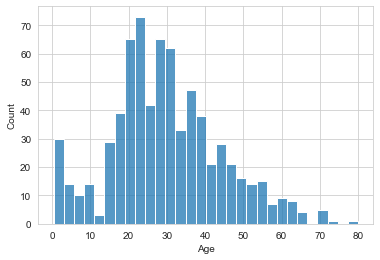

In [44]:
# a histogram of passengers by age
sns.histplot(train["Age"].dropna(),kde=False,bins=30)

In [45]:
import cufflinks as cf

In [46]:
cf.go_offline()

In [74]:
train["Fare"].iplot(kind="hist", bins=50)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

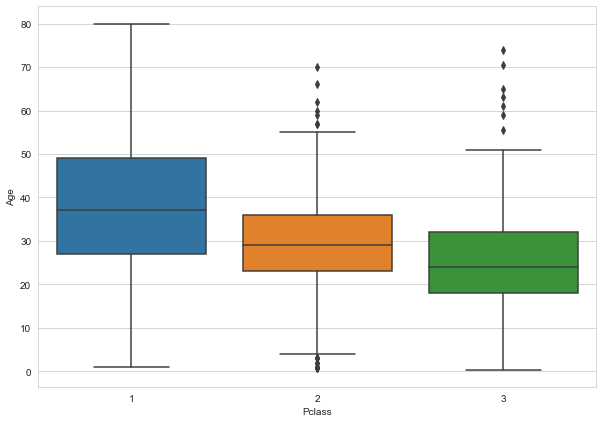

In [48]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y="Age", data=train)

In [49]:
# Cleaning data

In [50]:
# filling out the missing Age data

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37 # avg age of 1st class passenger
        elif Pclass == 2:
            return 29 # avg age of 2nd class passenger
        else:
            return 24 # avg age of 3rd class passenger
    else:
        return Age

In [51]:
train["Age"] = train[["Age","Pclass"]].apply(impute_age, axis=1)

In [52]:
train.drop("Cabin", axis=1,inplace=True)

In [53]:
train.dropna(inplace=True)

<AxesSubplot:>

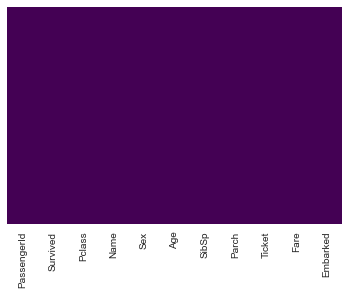

In [54]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [55]:
# Creating dummy values for machine learning model

In [56]:
sex = pd.get_dummies(train["Sex"], drop_first=True) # avoid multicollinearity, drop_first important!

In [57]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [58]:
train = pd.concat([train,sex,embark],axis=1)

In [59]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [60]:
# dropping unusable columns for machine learning algorythm, leaving only numeric data
train.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace=True)

In [61]:
train.drop("PassengerId", axis=1, inplace=True)

In [62]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [63]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

In [ ]:
# Logistic Regression

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
logmodel = LogisticRegression()

In [68]:
logmodel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [69]:
predictions = logmodel.predict(X_test)

In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       167
           1       0.72      0.75      0.74       100

    accuracy                           0.80       267
   macro avg       0.78      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267



In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y_test,predictions) # false positives and false negatives

array([[138,  29],
       [ 25,  75]], dtype=int64)